In [4]:
!pip install mlxtend  

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [62]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [63]:
df = pd.DataFrame()

In [64]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [65]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

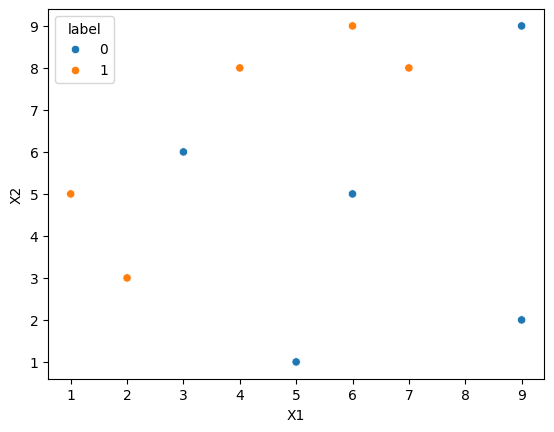

In [66]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [67]:
df['weights'] = 1/df.shape[0]

In [68]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [71]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [72]:
# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

Decision tree, Ne Yehi Split Kyon choose Ya apply Kia koi aur split kyun 
  Nahi? what is the step by step process followed?

⏺ Main decision tree ke split selection process ko step-by-step explain
  karta hun:

⏺ Read Notebook(adaboost_demo.ipynb)…
  ⎿  Read 71 cells

⏺ Decision tree split selection ka step-by-step process:

  1. Initial Data Analysis

  Pehle tree pure dataset ko dekhta hai:
  - 10 samples hain (5 class 0, 5 class 1)
  - Equal distribution hai, isliye root node ka gini = 0.5

  2. Possible Splits Evaluation

  Tree har feature aur har possible threshold pe split try karta hai:

  X1 feature ke possible splits:
  - X1 <= 1.5, X1 <= 2.5, X1 <= 3.5... etc

  X2 feature ke possible splits:
  - X2 <= 1.5, X2 <= 2.5, X2 <= 3.5... etc

  3. Gini Impurity Calculation for Each Split

  X1 <= 2.5 split ke liye:
  - Left child: X1 values [1,2] → labels [1,1] → Pure node (gini = 0)
  - Right child: X1 values [3,4,5,6,6,7,9,9] → labels [0,1,0,1,0,1,0,0]
    - 5 class 0, 3 class 1
    - Gini = 1 - (5/8)² - (3/8)² = 0.469

  Weighted Gini = (2/10) × 0 + (8/10) × 0.469 = 0.375

  4. Information Gain Calculation

  Information Gain = Parent Gini - Weighted Child Gini
  = 0.5 - 0.375 = 0.125

  5. Best Split Selection

  Algorithm sabhi possible splits ka information gain calculate karta hai
  aur highest information gain wala split choose karta hai.

  X1 <= 2.5 split best kyon hai:
  - Left child completely pure hai (perfect separation)
  - Maximum information gain deta hai
  - Simple linear boundary create karta hai

  6. Stopping Criteria

  max_depth=1 hai, toh tree sirf ek split kar sakta hai aur ruk jata hai.

  Key Points:
  - Decision tree greedy algorithm hai - har step pe locally best split
  choose karta hai
  - Exhaustive search karta hai - sabhi possible splits try karta hai
  - Information gain (ya gini reduction) maximize karta hai
  - Simple splits prefer karta hai jo data ko efficiently separate karen

Ye ek decision tree ki visualization hai jo matplotlib ke text objects ki
   list show kar rahi hai. Main isko explain karta hun:

  x[0] <= 2.5
  gini = 0.5
  samples = 10
  value = [5, 5]
  Root node: Ye tree ka starting point hai. Yahan pe:
  - x[0] <= 2.5 - split condition hai (first feature ki value 2.5 se kam ya
   equal hai?)
  - gini = 0.5 - maximum impurity hai (50-50 split between classes)
  - samples = 10 - total 10 data points hain
  - value = [5, 5] - 5 samples class 0 ke, 5 samples class 1 ke

  Left child (True branch):
  gini = 0.0
  samples = 2
  value = [0, 2]
  - Pure node hai (gini = 0)
  - Sirf 2 samples hain, dono class 1 ke

  Right child (False branch):
  gini = 0.469
  samples = 8
  value = [5, 3]
  - Impure node hai
  - 8 samples: 5 class 0 ke, 3 class 1 ke

  Text positions (0.5, 0.75), (0.25, 0.25) etc. ye matplotlib me nodes ki
  x,y coordinates hain tree visualization ke liye.

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

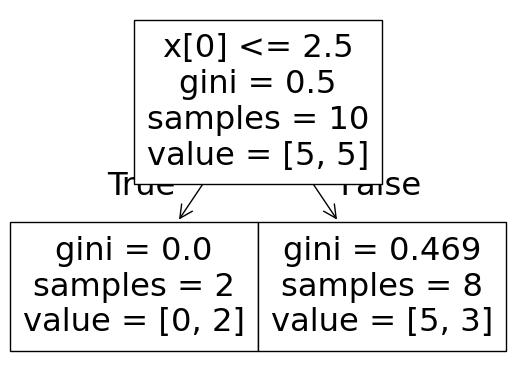

In [73]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

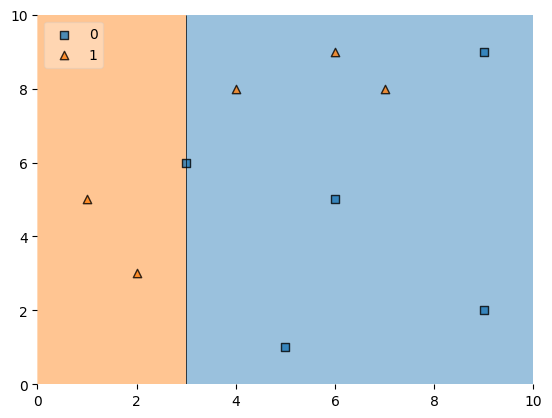

In [74]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [82]:
df['y_pred'] = dt1.predict(X)

In [83]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [84]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [85]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [86]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [87]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [88]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [25]:
df['updated_weights'].sum()

np.float64(0.9165153319682015)

In [89]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [90]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [91]:
df['nomalized_weights'].sum()

np.float64(1.0)

In [92]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [93]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [94]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [95]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [96]:
index_values = create_new_dataset(df)

index_values

[0, 5, 3, 0, 3, 3, 5, 7, 8, 6]

In [34]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [35]:
second_df

,X1,X2,label,weights
1,2,3,1,0.1
2,3,6,0,0.1
1,2,3,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
9,9,2,0,0.1
4,5,1,0,0.1
7,7,8,1,0.1
4,5,1,0,0.1


In [36]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [37]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [38]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.625, 0.5, '  False')]

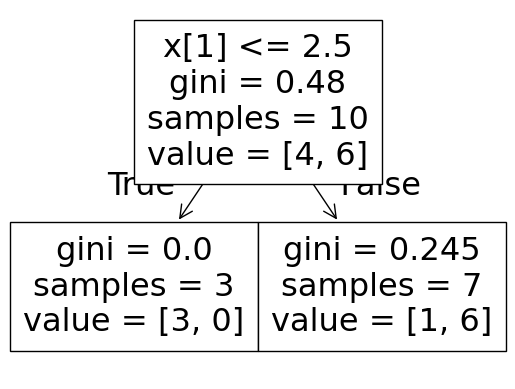

In [39]:
plot_tree(dt2)

<Axes: >

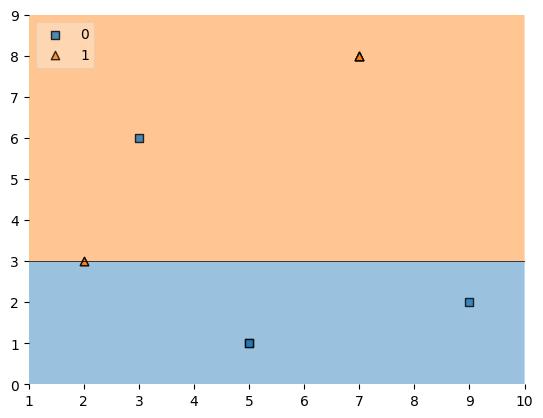

In [40]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [41]:
second_df['y_pred'] = dt2.predict(X)

In [42]:
second_df

,X1,X2,label,weights,y_pred
1,2,3,1,0.1,1
2,3,6,0,0.1,1
1,2,3,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
9,9,2,0,0.1,0
4,5,1,0,0.1,0
7,7,8,1,0.1,1
4,5,1,0,0.1,0


In [43]:
alpha2 = calculate_model_weight(0.1)

In [44]:
alpha2

np.float64(1.0986122886681098)

In [357]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [45]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [46]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
1,2,3,1,0.1,1,0.065508
7,7,8,1,0.1,1,0.065508
7,7,8,1,0.1,1,0.065508
7,7,8,1,0.1,1,0.065508
9,9,2,0,0.1,0,0.065508
4,5,1,0,0.1,0,0.065508
7,7,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508


In [47]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [48]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
1,2,3,1,0.1,1,0.065508,0.088259
2,3,6,0,0.1,1,0.152653,0.205670
1,2,3,1,0.1,1,0.065508,0.088259
7,7,8,1,0.1,1,0.065508,0.088259
7,7,8,1,0.1,1,0.065508,0.088259
7,7,8,1,0.1,1,0.065508,0.088259
9,9,2,0,0.1,0,0.065508,0.088259
4,5,1,0,0.1,0,0.065508,0.088259
7,7,8,1,0.1,1,0.065508,0.088259
4,5,1,0,0.1,0,0.065508,0.088259


In [49]:
second_df['nomalized_weights'].sum()

np.float64(0.9999999999999998)

In [50]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [51]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [52]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
1,2,3,1,0.1,1,0.088259,0.000000,0.088259
2,3,6,0,0.1,1,0.205670,0.088259,0.293929
1,2,3,1,0.1,1,0.088259,0.293929,0.382188
7,7,8,1,0.1,1,0.088259,0.382188,0.470447
7,7,8,1,0.1,1,0.088259,0.470447,0.558706
7,7,8,1,0.1,1,0.088259,0.558706,0.646965
9,9,2,0,0.1,0,0.088259,0.646965,0.735223
4,5,1,0,0.1,0,0.088259,0.735223,0.823482
7,7,8,1,0.1,1,0.088259,0.823482,0.911741
4,5,1,0,0.1,0,0.088259,0.911741,1.000000


In [53]:
index_values = create_new_dataset(second_df)

In [54]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [55]:
third_df

,X1,X2,label,weights
7,7,8,1,0.1
2,3,6,0,0.1
2,3,6,0,0.1
7,7,8,1,0.1
2,3,6,0,0.1
1,2,3,1,0.1
7,7,8,1,0.1
4,5,1,0,0.1
2,3,6,0,0.1
7,7,8,1,0.1


In [56]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

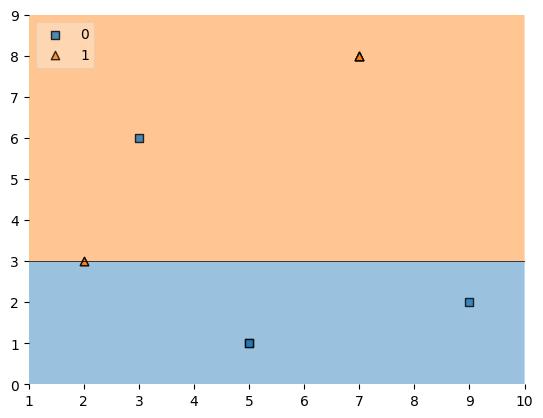

In [57]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [58]:
third_df['y_pred'] = dt3.predict(X)

In [59]:
third_df

,X1,X2,label,weights,y_pred
7,7,8,1,0.1,1
2,3,6,0,0.1,1
2,3,6,0,0.1,1
7,7,8,1,0.1,1
2,3,6,0,0.1,1
1,2,3,1,0.1,1
7,7,8,1,0.1,0
4,5,1,0,0.1,0
2,3,6,0,0.1,1
7,7,8,1,0.1,0


In [60]:
alpha3 = calculate_model_weight(0.7)
alpha3

np.float64(-0.4236489301936017)

In [61]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


### Prediction

In [375]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [376]:
dt2.predict(query)

array([1])

In [377]:
dt3.predict(query)

array([1])

In [378]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.09861228866811

In [379]:
np.sign(1.09)

1.0

In [380]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [381]:
dt2.predict(query)

array([0])

In [382]:
dt3.predict(query)

array([0])

In [383]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [384]:
np.sign(-0.25)

-1.0